<a href="https://colab.research.google.com/github/bigtimecodersean/Biodiverstiy/blob/main/Pytorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Super Basics 

In [1]:
import torch 

In [11]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)

tensor([[0.3146, 0.1283],
        [0.4089, 0.9612]])
tensor([[0.4810, 0.7168],
        [0.4452, 0.6967]])


In [17]:
z = x*y
print(z)

tensor([[0.1513, 0.0920],
        [0.1821, 0.6696]])


In [19]:
#Slicing
print(z[1,1].item())

0.6696261763572693


In [23]:
#Reshaping
x = torch.rand(4,4)
y = x.view(2,8)
print(x)
print(y)

tensor([[0.7164, 0.0918, 0.0026, 0.2648],
        [0.4866, 0.4327, 0.1794, 0.5089],
        [0.1519, 0.9823, 0.4226, 0.5413],
        [0.5599, 0.3142, 0.5560, 0.3547]])
tensor([[0.7164, 0.0918, 0.0026, 0.2648, 0.4866, 0.4327, 0.1794, 0.5089],
        [0.1519, 0.9823, 0.4226, 0.5413, 0.5599, 0.3142, 0.5560, 0.3547]])


In [24]:
#From numpy to torch 
import numpy as np
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [25]:
a += 1

In [26]:
print(a)

[2. 2. 2. 2. 2.]


In [27]:
print(b)

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [29]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  

SyntaxError: ignored

In [ ]:
#Numpy can only handle CPU tensors, not GPU 

#include requires_grade = True to tell Pytorch that you will require gardients to be tracked later 

Calculating Gradients

In [53]:
x = torch.randn(3, requires_grad = True)
print(x)

tensor([0.7246, 1.4243, 0.3129], requires_grad=True)


In [54]:
y = x+2

In [55]:
print(y)

tensor([2.7246, 3.4243, 2.3129], grad_fn=<AddBackward0>)


In [61]:
z = y*y*2

In [66]:
print(z)

tensor([14.8471, 23.4520, 10.6994], grad_fn=<MulBackward0>)


In [67]:
v = torch.tensor([.1, 1.0, .001], dtype = torch.float32)

tensor(16.3328, grad_fn=<MeanBackward0>)


In [68]:
z.backward(v) #dz/dx 

RuntimeError: ignored

In [ ]:
#Prevent python from tracking gradient history with grad_fn attribute 

In [69]:
print(x)

tensor([0.7246, 1.4243, 0.3129], requires_grad=True)


In [72]:
y = x.detach()
print(y)

tensor([0.7246, 1.4243, 0.3129])


In [76]:
x.requires_grad_(True)
print(x)

tensor([0.7246, 1.4243, 0.3129], requires_grad=True)


In [78]:
with torch.no_grad():
  z = x+2
  print(z)

tensor([2.7246, 3.4243, 2.3129])


In [80]:
import numpy as np


Empty gradients at each step  Incorrect gradidents

In [86]:
import torch
weights = torch.ones(4, requires_grad = True)
for epoch in range(3):
  model_output = (weights*3).sum()

  model_output.backward()

  print(weights.grad)

  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


Doing the same as above but in Optimizer: 

In [87]:
weights = torch.ones(4, requires_grad = True)
optimizer = torch.optim.SGD(weights,lr=.01)
optimizer.step()
optimizer.zero_grad()

TypeError: ignored

#Backpropagation & Calculating gradients 

In [88]:
import torch
x = torch.tensor(1.0)
y= torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad = True)
#forward pass and compute loss

y_hat = w*x
loss = (y_hat-y)**2
print(loss)

tensor(1., grad_fn=<PowBackward0>)


In [89]:
#Backward Pass
loss.backward()
print(w.grad)

tensor(-2.)


This is the first gradient after the forward and backward pass 

In [ ]:
###Update weights
###next forward and backward pass 

Gradient Descent Using Numpy


In [90]:
import numpy as np

In [93]:
#f = w*x
#f = 2*x
X = np.array([1,2,3,4], dtype = np.float32)
Y = np.array([2,4,6,8], dtype = np.float32)

#initialize w: 
w = 0.0

#model prediction

def forward(x):
  return w*x

#calculate loss = MSE
def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()

#Calculate gradient 
#MSE = 1/N*(w*x - y)**2
#dJ/dw = 1/N*2x*(w*x-y)
def gradient(x,y,y_predicted):
  return np.dot(2*x,y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training 
learning_rate = .01
n_iters = 20

for epoch in range(n_iters):
  #prediction = ford pass
  y_pred = forward(X)

  #loss 
  l = loss(Y, y_pred)

  #Gradients
  dw = gradient(X,Y, y_pred)

  #UPdate weights 
  w -= learning_rate*dw

  if epoch % 1 == 0: 
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')








Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
epoch 16: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 18: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
epoch 20: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


Now, with Pytorch 

In [96]:
import torch 


#f = w*x
#f = 2*x
X = torch.tensor([1,2,3,4], dtype = torch.float32)
Y = torch.tensor([2,4,6,8], dtype = torch.float32)

#initialize w: 
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

#model prediction is the same
def forward(x):
  return w*x

#calculate loss = MSE is the same
def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()

#Calculate gradient 


print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training 
learning_rate = .01
n_iters = 100

for epoch in range(n_iters):
  #prediction = ford pass
  y_pred = forward(X)

  #loss 
  l = loss(Y, y_pred)

  #Gradients = backward pass
  l.backward() #dl/dw

  #UPdate weights 
  #Don't want this opreationo be part of the computational graph ... wrap
  with torch.no_grad():
    w -= learning_rate*w.grad

  #Must empty gradients, because whenever we write backward, we accumulate them in the w.grad_ attributes... so need to make sure gradients are 0 before next iteration 
  w.grad.zero_()
  if epoch % 1 == 0: 
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')





Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 2: w = 0.555, loss = 21.67499924
epoch 3: w = 0.772, loss = 15.66018772
epoch 4: w = 0.956, loss = 11.31448650
epoch 5: w = 1.113, loss = 8.17471695
epoch 6: w = 1.246, loss = 5.90623236
epoch 7: w = 1.359, loss = 4.26725292
epoch 8: w = 1.455, loss = 3.08308983
epoch 9: w = 1.537, loss = 2.22753215
epoch 10: w = 1.606, loss = 1.60939169
epoch 11: w = 1.665, loss = 1.16278565
epoch 12: w = 1.716, loss = 0.84011245
epoch 13: w = 1.758, loss = 0.60698116
epoch 14: w = 1.794, loss = 0.43854395
epoch 15: w = 1.825, loss = 0.31684780
epoch 16: w = 1.851, loss = 0.22892261
epoch 17: w = 1.874, loss = 0.16539653
epoch 18: w = 1.893, loss = 0.11949898
epoch 19: w = 1.909, loss = 0.08633806
epoch 20: w = 1.922, loss = 0.06237914
epoch 21: w = 1.934, loss = 0.04506890
epoch 22: w = 1.944, loss = 0.03256231
epoch 23: w = 1.952, loss = 0.02352631
epoch 24: w = 1.960, loss = 0.01699772
epoch 25: w = 1.966, loss = 

Replace manually created loss and parameter updates with Pytorch Loss and Pytorch Optimizer 

general training pipeline, 3 steps: 

1. design model (inputsize, output size, forward pass 
2. construct loss and optimizer 
3. training loop
  - forward pass: compute prediction
  - Backward pass: gradients
  - update weights 

In [108]:
import torch 
import torch.nn as nn



#f = w*x
#f = 2*x
X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32)


X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

#model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    #define layers
    self.lin = nn.Linear(input_dim, output_dim)
  
  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

#Calculate gradient 


print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

#Training 
learning_rate = .015
n_iters = 200

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(n_iters):
  #prediction = ford pass
  y_pred = model(X)

  #loss 
  l = loss(Y, y_pred)

  #Gradients = backward pass
  l.backward() #dl/dw

  #UPdate weights 
  #Don't want this opreationo be part of the computational graph ... wrap
  optimizer.step()

  #Must empty gradients, because whenever we write backward, we accumulate them in the w.grad_ attributes... so need to make sure gradients are 0 before next iteration 
  optimizer.zero_grad()


  if epoch % 1 == 0: 
    [w,b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')




4 1
Prediction before training: f(5) = 0.068
epoch 1: w = 0.584, loss = 31.81148529
epoch 2: w = 0.931, loss = 17.87028503
epoch 3: w = 1.191, loss = 10.03900051
epoch 4: w = 1.386, loss = 5.63987541
epoch 5: w = 1.532, loss = 3.16871977
epoch 6: w = 1.642, loss = 1.78057671
epoch 7: w = 1.724, loss = 1.00080013
epoch 8: w = 1.786, loss = 0.56276619
epoch 9: w = 1.832, loss = 0.31670156
epoch 10: w = 1.867, loss = 0.17847285
epoch 11: w = 1.893, loss = 0.10081942
epoch 12: w = 1.912, loss = 0.05719383
epoch 13: w = 1.927, loss = 0.03268259
epoch 14: w = 1.938, loss = 0.01890882
epoch 15: w = 1.946, loss = 0.01116659
epoch 16: w = 1.952, loss = 0.00681267
epoch 17: w = 1.957, loss = 0.00436207
epoch 18: w = 1.961, loss = 0.00298069
epoch 19: w = 1.963, loss = 0.00219995
epoch 20: w = 1.965, loss = 0.00175668
epoch 21: w = 1.967, loss = 0.00150300
epoch 22: w = 1.968, loss = 0.00135587
epoch 23: w = 1.969, loss = 0.00126865
epoch 24: w = 1.970, loss = 0.00121510
epoch 25: w = 1.971, loss

Implement Linear Regression

In [111]:
import torch
import torch.nn as nn
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt

epoch: 10, loss = 4400.1929
epoch: 20, loss = 3280.9666
epoch: 30, loss = 2471.6985
epoch: 40, loss = 1885.8953
epoch: 50, loss = 1461.4125
epoch: 60, loss = 1153.5300
epoch: 70, loss = 930.0215
epoch: 80, loss = 767.6320
epoch: 90, loss = 649.5594
epoch: 100, loss = 563.6508


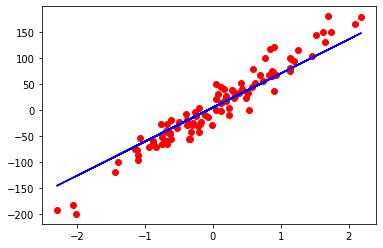

In [112]:
#0. Prepare Data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features =1, noise = 20, random_state =1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

#1. model

#use built in linear model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)



#2. Loss and optimizer

learning_rate = .01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#3. Training Loop

num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  #Backward pass
  loss.backward()

  #Update
  optimizer.step()

  optimizer.zero_grad()


  if (epoch+1)%10 ==0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

#plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()




Logistic Regression 



In [116]:
import torch 
import torch.nn as nn
import numpy
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#)0 Prepare data

bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 1234)

#scale features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#convert to torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#reshape tensor from 1 row to 1 column
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)



#1) Model 

#f = wx+b, sigmoid at the end

class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)
  
  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)
                           
#2) Optimizer and loss

learning_rate = .01
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

#3) 
num_epochs = 100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  #backward pass
  loss.backward()

  #updates
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])

  print(f'accuracy = {acc:.4f}')






epoch: 10, loss = 0.2935
epoch: 20, loss = 0.1805
epoch: 30, loss = 0.1364
epoch: 40, loss = 0.1144
epoch: 50, loss = 0.1013
epoch: 60, loss = 0.0925
epoch: 70, loss = 0.0859
epoch: 80, loss = 0.0807
epoch: 90, loss = 0.0763
epoch: 100, loss = 0.0726
accuracy = 0.9561


In [ ]:
#play around with 
 #- learning rate, num_epochs, diff optimizer 
